
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 1 - Constraint Satisfaction Problem <br>
<font color=696880 size=4>
Amirabbas Afzali 

____

# Personal Data

In [1]:
# Set your student number
student_number = '400104801'
Name = 'Mehran'
Last_Name = 'Bakhtiari'

# Rules
- Make sure that all of your cells can be run perfectly. 

---

# **Graph coloring**

Hello, In this question, we have an engaging problem scenario based on **graph coloring**. Imagine a fictional scenario involving a group of interstellar travelers exploring a mysterious alien planet called **Zyra**. The planet is covered in exotic flora and fauna, and the explorers need to map its regions while adhering to certain rules. Here’s the scenario:


## **The Zyran Flora Expedition**

### **Background:**

The Zyran Flora Expedition, led by renowned botanist Dr. Elara, has landed on the lush and vibrant planet Zyra. Their mission is to catalog the various plant species across the planet’s diverse ecosystems. However, there’s a catch: each plant species emits a unique energy signature that affects the surrounding vegetation. Dr. Elara wants to create a map of Zyra’s regions, ensuring that no two adjacent regions contain the same type of plant.

### **Problem Statement:**
Given the map of Zyra, represented as an undirected graph where each vertex corresponds to a region, design an algorithm to color the regions using as few colors as possible while adhering to the following rules:

1. **Color Constraints:**
- Each region can be assigned one of the available colors.
- No two adjacent regions (sharing a border) can have the same color if they contain the same type of plant.

2. **Objective:**
- Minimize the total number of colors used while ensuring that the map remains scientifically accurate.

3. **Input:**
- A graph representing Zyra’s regions, where vertices represent different ecological zones, and edges connect neighboring zones.

4. **Output:**
- A valid coloring scheme for the regions, using the fewest possible colors.

### **Example:**
Consider a simplified map of Zyra with the following regions and their connections:

**Regions:** A, B, C, D, E, F
**Connections:**
- A and B share a border.
- B and C share a border.
- C and D share a border.
- D and E share a border.
- E and F share a border.

The goal is to color these regions using as few colors as possible. One valid coloring could be:

- A: Green (contains unique plant species X)
- B: Blue (contains unique plant species Y)
- C: Red (contains unique plant species Z)
- D: Green (contains unique plant species X)
- E: Blue (contains unique plant species Y)
- F: Red (contains unique plant species Z)

In this example, only three colors (Green, Blue, and Red) are needed to represent Zyra’s diverse flora.


## Input
  - The first line determines $N$ (count of regions).
  - The third line determines $M$ (count of possible colors for each region).
  - in each of the following lines, a pair of region numbers (adjacent constraints) is given.

$$1 \le N \le 60$$
$$1 \le M \le 5$$

### Sample Input
This sample describes the previous example.

```
N = 6
# Colors
colors = 3
# Graph: 
0,1
1,2
2,3
3,4
4,5
```

### Imports

Feel free to import any library you need.

Necessary Functions and classes :

## Note
  - You _must_ implement and use AC-3 algorithm.
  - You _must_ implement and use the heuristic algorithms **MRV** and **LCV** in order to pass all tests in an appropriate time.

## Your code
**Note:** It's OK to change the signature for the given functions and the given structure is just a suggestion to help you with the implementation. (you can't remove or add any cells)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


np.random.seed(1234)


class GraphColoringSolver:
    def __init__(self):
        self.adjacency_list = {}
        self.start_variables = {}
        self.num_colors = 0

    def read_graph(self, filename):
        self.adjacency_list.clear()
        self.start_variables.clear()
        try:
            with open(filename, "r") as f:
                for line in f:
                    self._parse_line(line)
        except FileNotFoundError:
            print(f"File {filename} not found.")

    def _parse_line(self, line):
        if line.startswith('#') or not line.strip():
            return
        if line.startswith('c'):
            self.num_colors = int(''.join(filter(str.isdigit, line)))
            return
        node1, node2 = map(int, line.strip().split(","))
        self._update_adjacency_list(node1, node2)
        self._initialize_start_variables(node1)
        self._initialize_start_variables(node2)

    def _update_adjacency_list(self, node1, node2):
        self.adjacency_list.setdefault(node1, []).append(node2)
        self.adjacency_list.setdefault(node2, []).append(node1)

    def _initialize_start_variables(self, node):
        if node not in self.start_variables:
            self.start_variables[node] = [None, list(range(1, self.num_colors + 1))]

    def solve(self):
        initial_state = State({}, self.start_variables.copy(), self.adjacency_list, None)
        solution = self._backtrack_search(initial_state)
        if solution:
            solution.print_solution()
            solution.visualize()
            return solution.variables
        else:
            print("No solution exists.")
            return None

    def _backtrack_search(self, state):
        if len(state.arc_consistency()) < len(state.variables):
            return None
        if len(state.assigned) == len(state.variables):
            return state

        selected_var = state.minimum_remaining_variable()
        state.curr = selected_var
        values = state.least_constraining_value()
        for color in values:
            new_state = state.create_new_state(selected_var, color)
            if new_state.is_consistent():
                result = self._backtrack_search(new_state)
                if result:
                    return result
        return None


class State:
    def __init__(self, assigned, variables, adjacency_list, curr=None):
        self.assigned = assigned
        self.variables = variables
        self.adjacency_list = adjacency_list
        self.curr = curr

    def arc_consistency(self):
        new_variables = {}
        for var in self.variables:
            val, values = self.variables[var]
            if val is None:
                if values:
                    new_variables[var] = (val, values)
            else:
                consistent = all(self.variables[u][0] != val for u in self.adjacency_list[var])
                if consistent:
                    new_variables[var] = (val, values)
        return new_variables

    def minimum_remaining_variable(self):
        unassigned_variables = [(var, len(self.variables[var][1])) for var in self.variables if var not in self.assigned]
        return min(unassigned_variables, key=lambda x: x[1])[0]

    def least_constraining_value(self):
        var = self.curr
        values = self.variables[var][1]
        return sorted(values, key=lambda value: sum(1 for u in self.adjacency_list[var] if value in self.variables[u][1]))

    def create_new_state(self, selected_var, color):
        new_assigned = self.assigned.copy()
        new_assigned[selected_var] = color
        new_variables = self.variables.copy()
        new_variables[selected_var] = (color, [])
        return State(new_assigned, new_variables, self.adjacency_list, selected_var)

    def is_consistent(self):
        if self.curr is None:
            return False
        curr_color = self.variables[self.curr][0]
        if curr_color is None:
            return True
        return all(curr_color != self.variables[u][0] for u in self.adjacency_list[self.curr])

    def print_solution(self):
        for var, (color, _) in self.variables.items():
            print(f"Region ID: {var} - Region Color: {color}")

    def visualize(self):
        G = nx.Graph()
        G.add_nodes_from(self.adjacency_list.keys())
        for node, neighbours in self.adjacency_list.items():
            for neighbour in neighbours:
                G.add_edge(node, neighbour)
        pos = nx.spring_layout(G)
        colors_map = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'pink', 6: 'brown'}
        node_colors = {node: colors_map[color] for node, (color, _) in self.variables.items() if color is not None}
        nx.draw(G, pos, with_labels=True, node_color=list(node_colors.values()))
        plt.show()

## Validate:

In order to validate your implementation , run below blocks.
 
**Note that** correct implementation of different functions (LCV, MVR, ...) and final results are needed to get full score.


Test 1: 
Region ID: 1 - Region Color: 1
Region ID: 2 - Region Color: 2
Region ID: 3 - Region Color: 1
Region ID: 4 - Region Color: 2


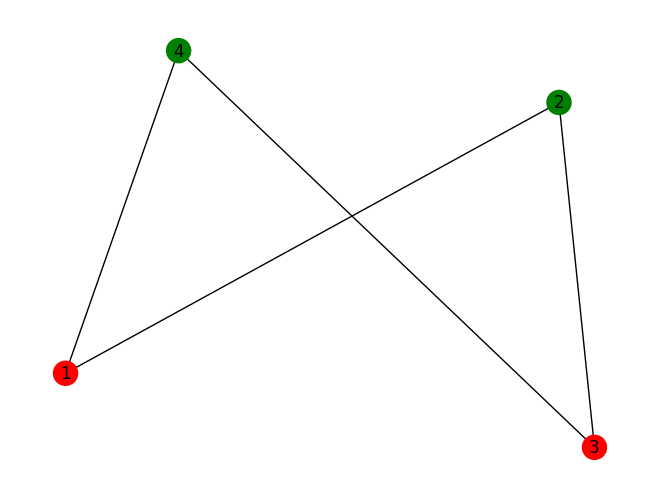

Test 2: 
Region ID: 1 - Region Color: 1
Region ID: 2 - Region Color: 2
Region ID: 3 - Region Color: 3
Region ID: 4 - Region Color: 3
Region ID: 5 - Region Color: 2
Region ID: 6 - Region Color: 1
Region ID: 7 - Region Color: 4


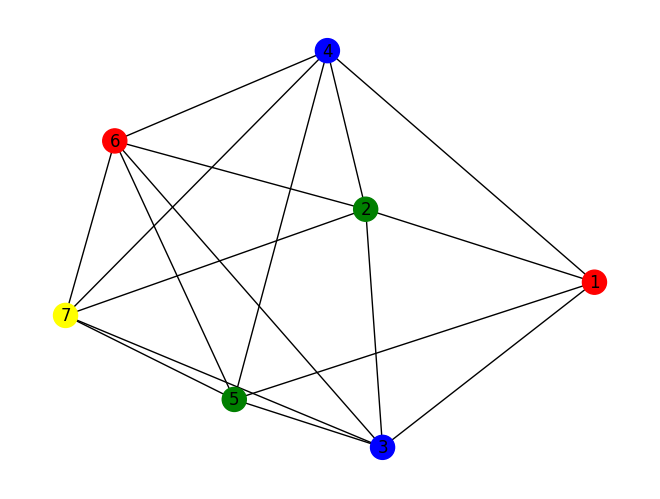

Test 3: 
Region ID: 0 - Region Color: 1
Region ID: 1 - Region Color: 2
Region ID: 2 - Region Color: 2
Region ID: 3 - Region Color: 2
Region ID: 4 - Region Color: 1
Region ID: 5 - Region Color: 3
Region ID: 6 - Region Color: 2
Region ID: 7 - Region Color: 3
Region ID: 8 - Region Color: 1
Region ID: 9 - Region Color: 1
Region ID: 10 - Region Color: 1
Region ID: 11 - Region Color: 2
Region ID: 12 - Region Color: 3
Region ID: 13 - Region Color: 2
Region ID: 14 - Region Color: 1
Region ID: 15 - Region Color: 3
Region ID: 16 - Region Color: 2
Region ID: 17 - Region Color: 1
Region ID: 18 - Region Color: 1
Region ID: 19 - Region Color: 1
Region ID: 20 - Region Color: 3
Region ID: 21 - Region Color: 1
Region ID: 22 - Region Color: 2
Region ID: 23 - Region Color: 2
Region ID: 24 - Region Color: 1
Region ID: 25 - Region Color: 3
Region ID: 26 - Region Color: 2
Region ID: 27 - Region Color: 3
Region ID: 28 - Region Color: 1
Region ID: 29 - Region Color: 2
Region ID: 30 - Region Color: 2
Region ID

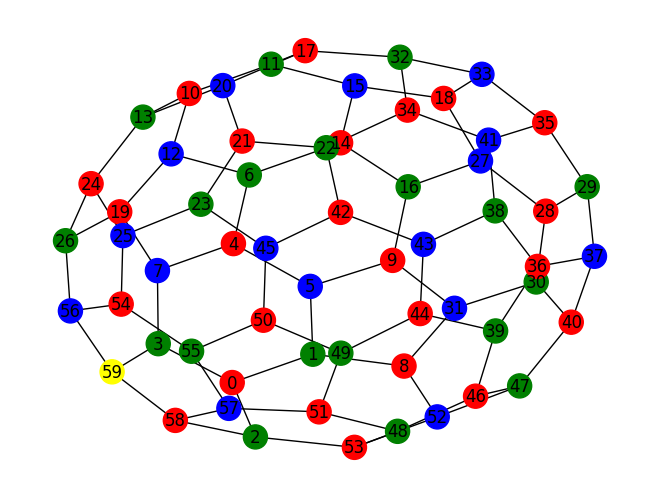

Test 4: 
Region ID: 0 - Region Color: 1
Region ID: 1 - Region Color: 2
Region ID: 2 - Region Color: 3
Region ID: 3 - Region Color: 2
Region ID: 4 - Region Color: 3
Region ID: 5 - Region Color: 2
Region ID: 6 - Region Color: 3
Region ID: 7 - Region Color: 3
Region ID: 8 - Region Color: 1
Region ID: 9 - Region Color: 1
Region ID: 10 - Region Color: 4
Region ID: 11 - Region Color: 1
Region ID: 12 - Region Color: 2
Region ID: 13 - Region Color: 4
Region ID: 14 - Region Color: 3
Region ID: 15 - Region Color: 1
Region ID: 16 - Region Color: 4
Region ID: 17 - Region Color: 2
Region ID: 18 - Region Color: 4
Region ID: 19 - Region Color: 3
Region ID: 20 - Region Color: 1
Region ID: 21 - Region Color: 2
Region ID: 22 - Region Color: 4


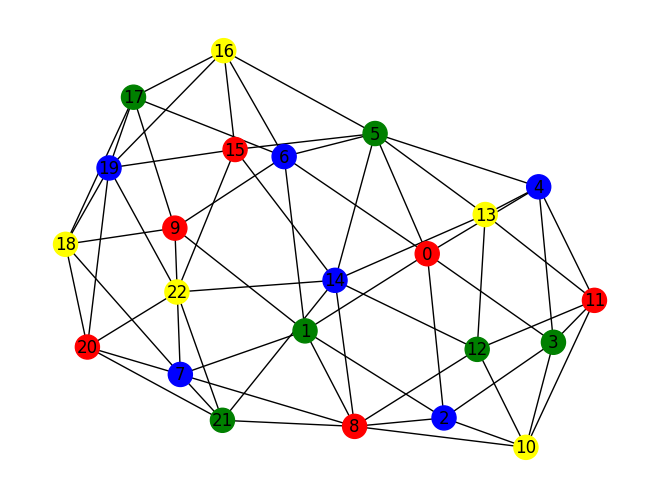

Test 5: 
Region ID: 0 - Region Color: 1
Region ID: 1 - Region Color: 2
Region ID: 2 - Region Color: 2
Region ID: 3 - Region Color: 2
Region ID: 4 - Region Color: 1
Region ID: 5 - Region Color: 3
Region ID: 6 - Region Color: 2
Region ID: 7 - Region Color: 3
Region ID: 8 - Region Color: 1
Region ID: 9 - Region Color: 1
Region ID: 10 - Region Color: 1
Region ID: 11 - Region Color: 2
Region ID: 12 - Region Color: 3
Region ID: 13 - Region Color: 2
Region ID: 14 - Region Color: 1
Region ID: 15 - Region Color: 3
Region ID: 16 - Region Color: 2
Region ID: 17 - Region Color: 1
Region ID: 18 - Region Color: 1
Region ID: 19 - Region Color: 1
Region ID: 20 - Region Color: 3
Region ID: 21 - Region Color: 1
Region ID: 22 - Region Color: 2
Region ID: 23 - Region Color: 2
Region ID: 24 - Region Color: 1
Region ID: 25 - Region Color: 3
Region ID: 26 - Region Color: 2
Region ID: 27 - Region Color: 3
Region ID: 28 - Region Color: 1
Region ID: 29 - Region Color: 2
Region ID: 30 - Region Color: 2
Region ID

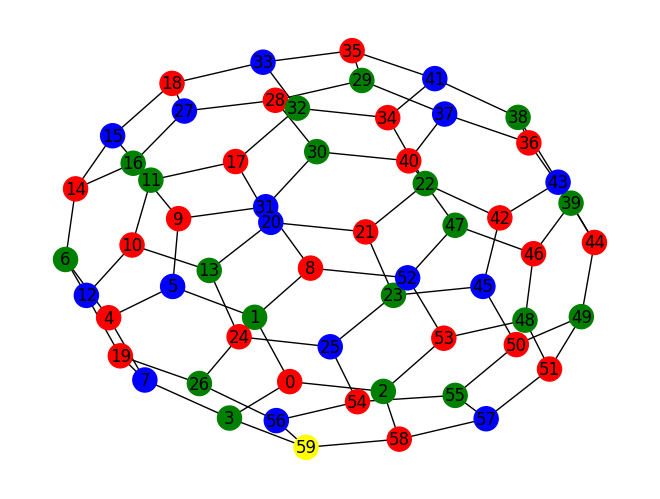

Test 6: 
Region ID: 0 - Region Color: 1
Region ID: 1 - Region Color: 2
Region ID: 2 - Region Color: 2
Region ID: 3 - Region Color: 3
Region ID: 4 - Region Color: 3
Region ID: 5 - Region Color: 4
Region ID: 6 - Region Color: 1
Region ID: 7 - Region Color: 4
Region ID: 8 - Region Color: 2
Region ID: 9 - Region Color: 2
Region ID: 10 - Region Color: 3
Region ID: 11 - Region Color: 1
Region ID: 12 - Region Color: 3
Region ID: 13 - Region Color: 2
Region ID: 14 - Region Color: 4
Region ID: 15 - Region Color: 3
Region ID: 16 - Region Color: 1


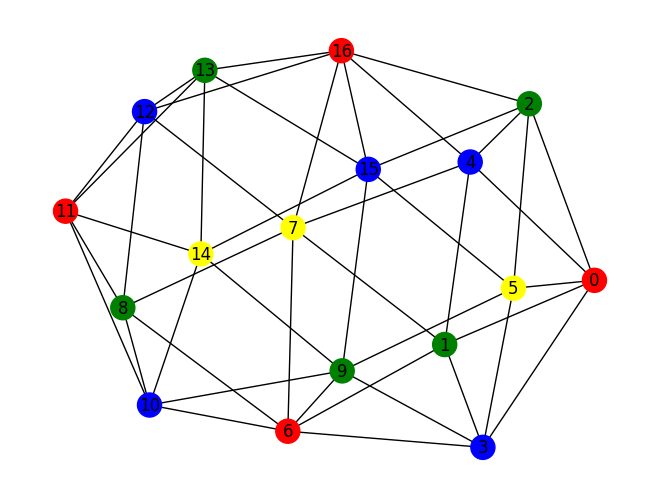

In [3]:
num_tests = 6
for i in range(num_tests):
    print(f'Test {i+1}: ')
    solver = GraphColoringSolver()
    solver.read_graph(f'data/input{i}.txt')
    solver.solve()
    print('='*90)

### Plot results of first 6 test-cases :
Already plotted above!

# **Best regards :)**